In [1]:
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline


In [2]:
#Parâmetros
xmin = -2                                             #Valor mínimo
xmax = 3                                               #Valor máximo
probc = 0.8                                             #Probabilidade de Cruzamento
probm = 0.05                                            #Probabilidade de mutação
geracoes = 20                                            #Numero de Gerações
bits = 15                                                #Número de Bits para a representação do número


In [3]:
from models.agbinario import agbinario

AG = agbinario.AlgoritmoGeneticoBin(probc, probm)

In [4]:
L = 10                                                   #Tamanho da população
Po,Po_Binario = AG.populacaoBinaria(L,bits,xmin,xmax)      #População inicial
Fitness_Inicial = AG.avaliacao(Po)                         #Avaliação do fitness da população inicial

linha = []
out = []
SolucaoX = []
SolucaoY = []

for loop in range(0, geracoes):
    out.append(max(Fitness_Inicial))
    linha.append(loop)
    indice_Best_Solucao = np.argmax(Fitness_Inicial)
    SolucaoX.append(Po[indice_Best_Solucao])
    SolucaoY.append(Fitness_Inicial[indice_Best_Solucao])

    #Operador de Seleção Roleta
    Ps, Ps_Binario = AG.selecao_roleta(Po,Po_Binario,bits,Fitness_Inicial)
    #Ps, Ps_Binario = selecao_torneio(Po,Po_Binario,Fitness_Inicial)
    #Operador de Cruzamento
    Pc_Binario = AG.cruzamento(Ps_Binario,bits)
    #Operador de Mutação
    Pm_Binario,Fitness_Final,Pfinal = AG.mutacao(Pc_Binario,bits,xmin,xmax)
    #operador de Elitismo
    Po,Po_Binario,Fitness_Inicial = AG.elitismo(Fitness_Inicial,Fitness_Final,Po,Po_Binario,Pm_Binario,Pfinal)

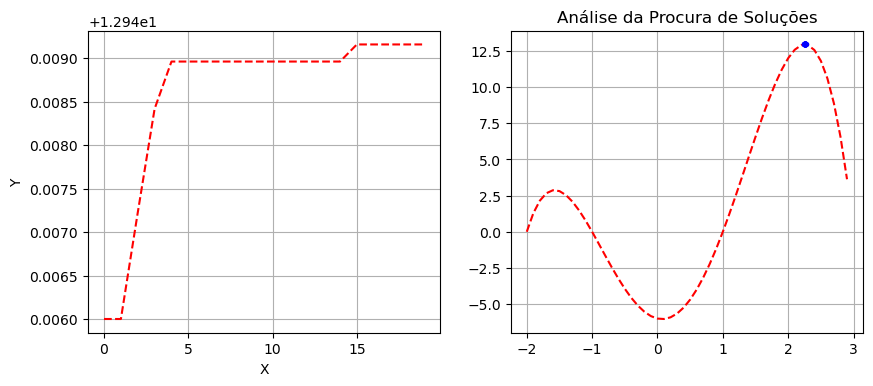

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi= 100)

#Solução Final
axs[0].plot(linha, out, 'r--')
plt.title("Fitness vs #Gerações")
axs[0].set(xlabel="Gerações",ylabel="Fitness")
axs[0].grid("on")

#Análise da Procura de Soluções
in_array = np.arange(xmin,xmax,0.1)
axs[1].plot(in_array, AG.avaliacao(in_array), 'r--',SolucaoX,AG.avaliacao(SolucaoX),'b.')
axs[1].set_title('Análise da Procura de Soluções')
axs[0].set(xlabel="X",ylabel="Y")
axs[1].grid("on")
